# Analyses specifically for grant proposal
- Some genes and hypoxia hallmark gene set

In [33]:
input_file = "/data/cephfs-1/home/users/cemo10_c/work/scRNA/scRNA_preprocessing_pipeline/results/chosen_branch/adata_stripped.h5ad"
clusters_file = "/data/cephfs-1/home/users/cemo10_c/work/scRNA/scRNA_preprocessing_pipeline/results/chosen_branch/leiden_res0.4.csv"

In [34]:
import scanpy as sc
import pandas as pd

adata = sc.read(input_file)
# clusters = pd.read_csv(clusters_file, index_col=0)
# adata.obs['clusters'] = clusters.astype('category')
adata.X = adata.layers['log1p_norm_of_counts']

Are the genes present in the data?

In [35]:
genes = ['EGLN1', 'HIF1a', 'Ki67']

In [36]:
import difflib

genes_found = []
for gene in genes:
    matches = difflib.get_close_matches(gene, adata.var_names, n=5)
    print(matches)
    genes_found.append(matches[0])

['EGLN1', 'EGLN3', 'EGLN2', 'ELN', 'GALNT1']
['HIF1A', 'HIF1AN', 'WIF1', 'RIF1', 'PIF1']
['MKI67']


In [37]:
genes_found

['EGLN1', 'HIF1A', 'MKI67']

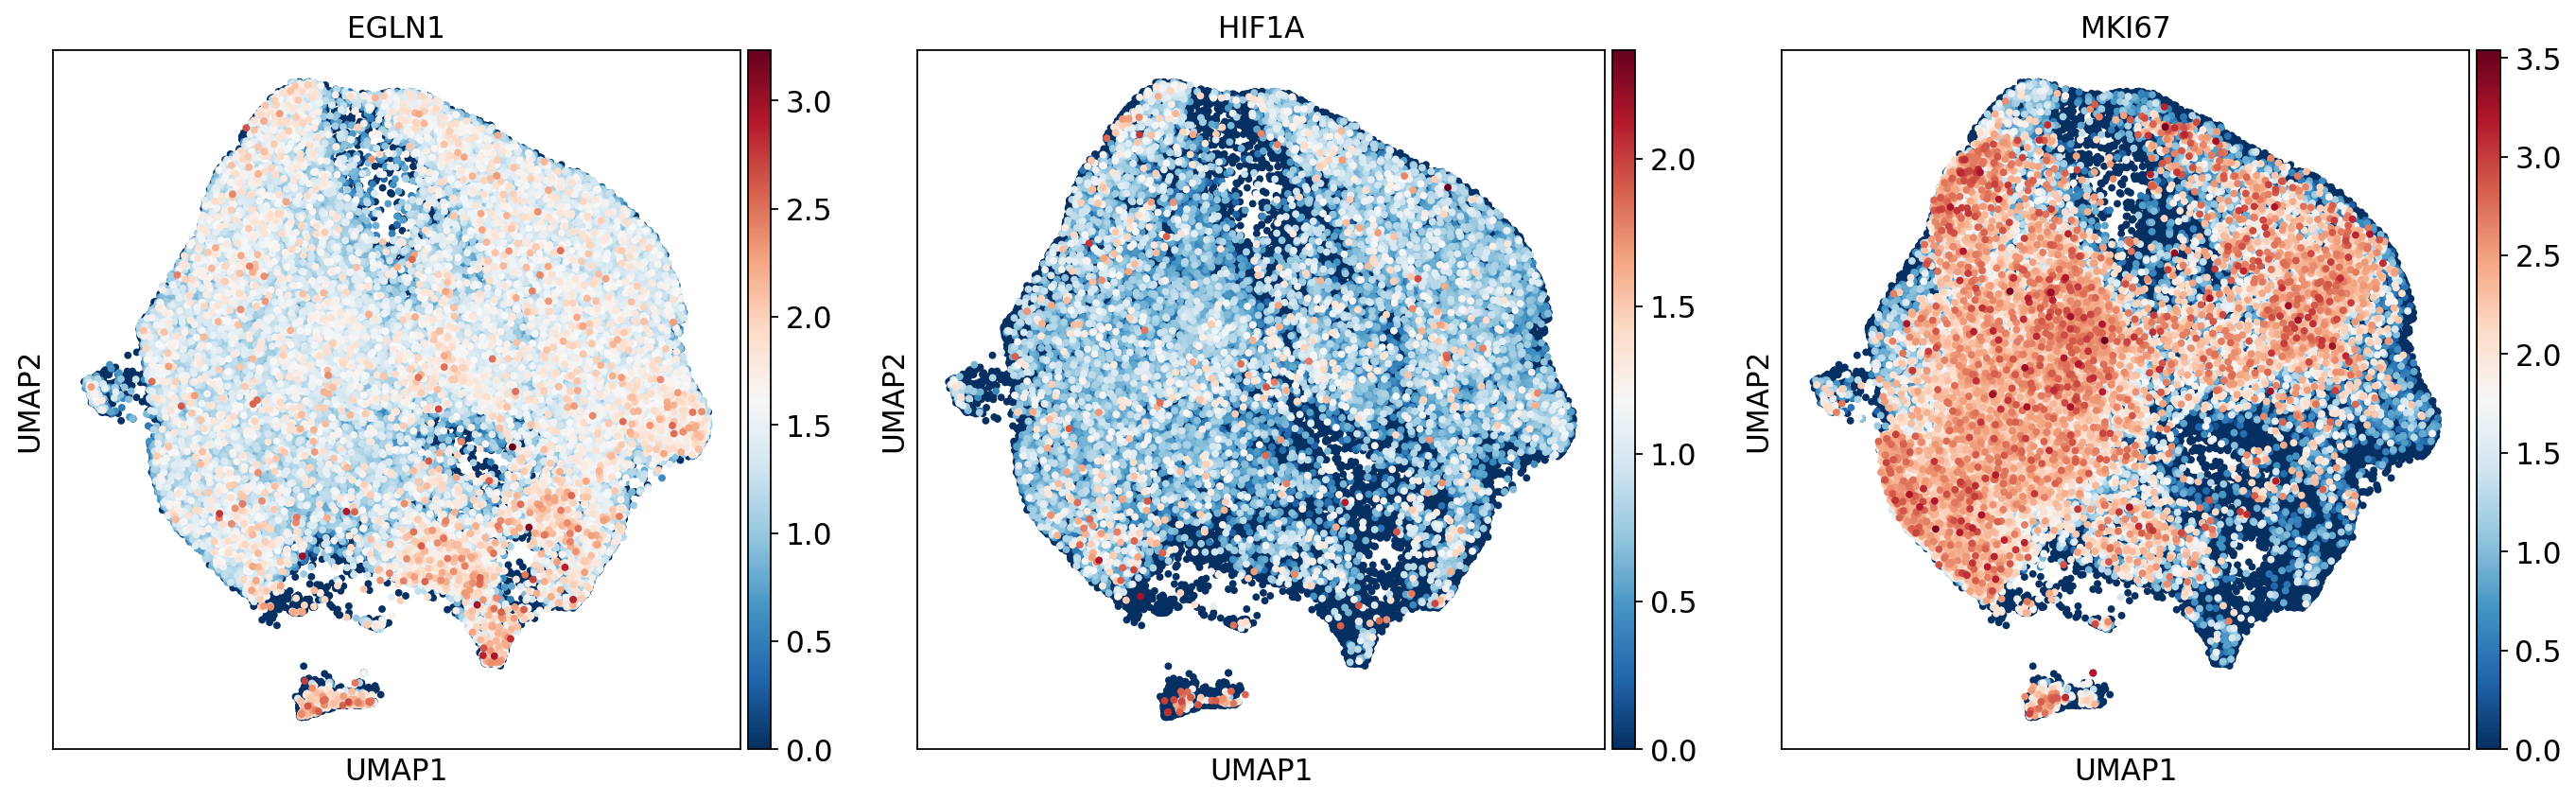

In [38]:
sc.settings.set_figure_params(dpi=80, figsize=(6, 6))
sc.pl.umap(adata, color=genes_found, size=50, cmap='RdBu_r', use_raw=False)

In [39]:
import decoupler
df = decoupler.read_gmt("/data/cephfs-1/home/users/cemo10_c/work/scRNA/scRNA_preprocessing_pipeline/resources/HALLMARK_HYPOXIA.v2024.1.Hs.gmt")

       'CAV1', 'CAVIN3', 'CCN5', 'CHST2', 'CHST3', 'COL5A1', 'CP', 'CSRP2',
       'DCN', 'DPYSL4', 'EDN2', 'ENO3', 'GAPDH', 'GAPDHS', 'GCK', 'GCNT2',
       'HAS1', 'IGFBP1', 'IL6', 'INHA', 'KIF5A', 'LALBA', 'LDHA', 'LOX',
       'MT1E', 'NCAN', 'PFKL', 'PGAM2', 'PPFIA4', 'PPP1R3C', 'PYGM', 'RRAGD',
       'SDC2', 'SLC2A3', 'SLC2A5', 'STC1', 'TGFB3', 'TKTL1', 'TPI1'],
      dtype='object')


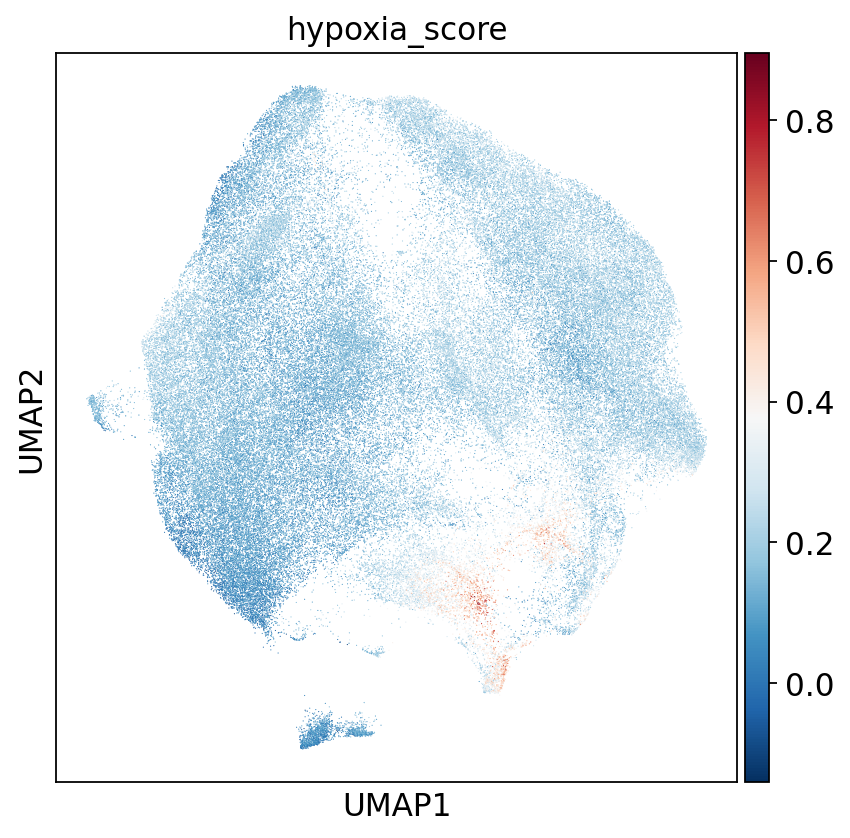

In [45]:
# List of hypoxia genes from the GMT file
hypoxia_genes = df.loc[:,"target"]

# Score each cell for hypoxia signature
sc.tl.score_genes(adata, hypoxia_genes, score_name="hypoxia_score", use_raw = False)

# Visualize the scores in UMAP
sc.pl.umap(adata, color="hypoxia_score", cmap='RdBu_r')

Attempt a similar figure as this one (for hypoxia only) from figure 3b in [this paper](https://elifesciences.org/articles/43803):

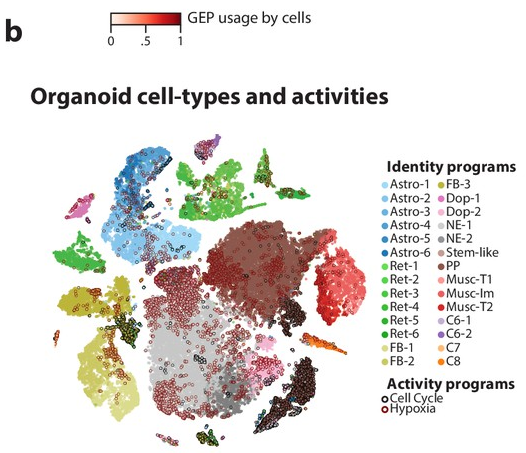

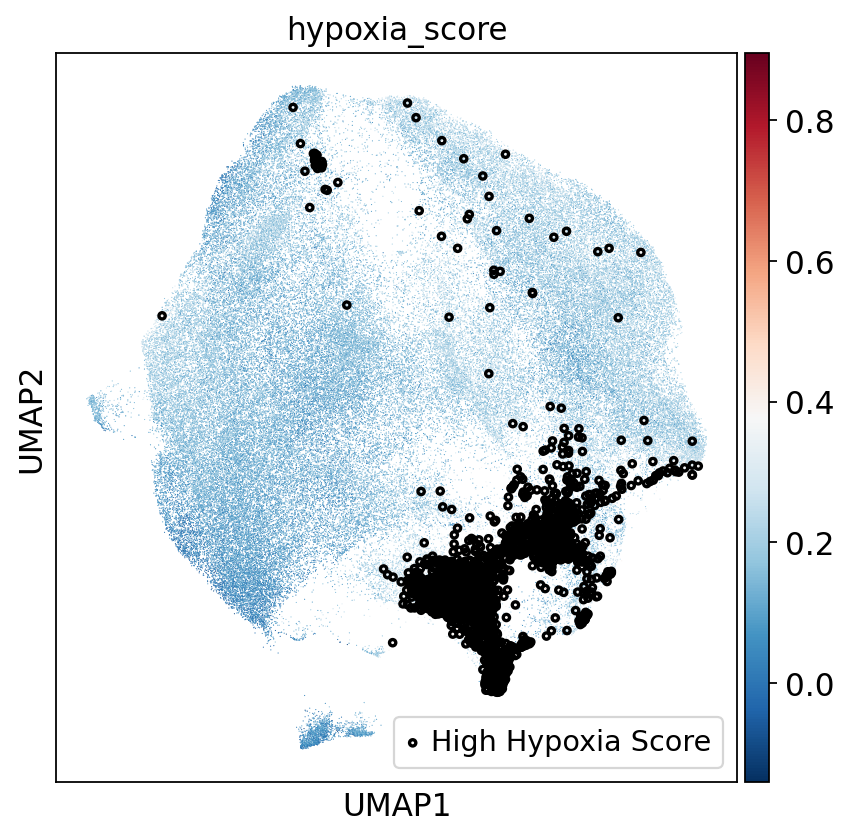

In [44]:
import scanpy as sc
import matplotlib.pyplot as plt

# Plot base UMAP with all points
fig, ax = plt.subplots(figsize=(6, 6))
sc.pl.umap(adata, color="hypoxia_score", cmap="RdBu_r", ax=ax, show=False)

# Get UMAP coordinates
umap_coords = adata.obsm["X_umap"]
hypoxia_scores = adata.obs["hypoxia_score"]

# Identify high-hypoxia cells
high_hypoxia = hypoxia_scores > 0.4

# Overlay high-hypoxia cells with larger circles
ax.scatter(
    umap_coords[high_hypoxia, 0], 
    umap_coords[high_hypoxia, 1], 
    s=8,  # Size of the circle
    edgecolors="black",  # Black outline
    facecolors="none",  # Transparent fill
    linewidth=1.5,
    label="High Hypoxia Score"
)

# Add legend
ax.legend()

# Show plot
plt.show()


So far, it look bad and does not add informational value.